In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
def print_file_sizes(input_path, subset):
    print('{}:'.format(subset))
    print('')
    path = input_path + subset + '/'
    for f in os.listdir(path):
        if not os.path.isdir(path + f):
            print(f.ljust(30) + str(round(os.path.getsize(path + f) / 1000000, 2)) + 'MB')
        else:
            sizes = [os.path.getsize(path+f+'/'+x)/1000000 for x in os.listdir(path + f)]
            print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
    print('')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as pltrans
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torchvision
import pandas as pd
import torch
from torch.utils.data import TensorDataset
import torchvision.transforms as transforms
import torch.nn as nn
import time
import copy
import PIL
from tqdm import tqdm
from torchsummary import summary
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
if os.path.isdir('/content/gdrive/My Drive/paw_train/'):
    print('Found dataset' )
else:
    print('No such dataset')   

Found dataset


In [ ]:
input_path = '/content/gdrive/My Drive/paw_train/'
train = pd.read_csv(input_path+'/train.csv')
train_label=torch.tensor(train['Pawpularity'].values)
transform= torchvision.transforms.Compose([
    transforms.Resize((224,224)),    
    transforms.ToTensor()
])
train_set = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/paw_train/',transform=transform)

In [ ]:
#train = pd.read_csv(input_path+'/train.csv')

In [ ]:
start=time.time()
all_data = []
for i in tqdm(range(len(train_set))):
    all_data.append([train_set[i], train_label[i]])
end=time.time()

100%|██████████| 9912/9912 [03:07<00:00, 52.78it/s]


In [ ]:
train_val_split = [0.9, 0.1]
train_set, val_set= torch.utils.data.random_split(all_data, [round(p * len(all_data)) for p in train_val_split])

train_loader=torch.utils.data.DataLoader(train_set,batch_size=32)
val_loader=torch.utils.data.DataLoader(val_set,batch_size=32)

In [ ]:
#dataloaders=torch.utils.data.DataLoader(train_data,batch_size=32)

In [ ]:
# input_units = 3*224*224  ##[1*28*28] =784

# import torch.nn as nn
# class WangNet(nn.Module):
#     def __init__(self) -> None:
#         #super(WangNet, self).__init__()
#         super().__init__()
#         self.block1 = nn.Sequential(
#             nn.Conv2d(3, 64, 3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, 3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, 3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(64, affine=True),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )
#         self.block2 = nn.Sequential(nn.Conv2d(64, 128, 3, stride=1, padding=1),
#                                     nn.ReLU(),
#                                     nn.Conv2d(128, 128, 3, stride=1, padding=1),
#                                     nn.ReLU(),
#                                     nn.Conv2d(128, 128, 3, stride=1, padding=1),
#                                     nn.ReLU(),
#                                     nn.BatchNorm2d(128, affine=True),
#                                     nn.MaxPool2d(kernel_size=2, stride=2)
#                                     )
#         self.block3 = nn.Sequential(nn.Conv2d(128, 256, 3, stride=1, padding=1),
#                                     nn.ReLU(),
#                                     nn.Conv2d(256, 256, 3, stride=1, padding=1),
#                                     nn.ReLU(),
#                                     nn.Conv2d(256, 256, 3, 1, 1),
#                                     nn.ReLU(),
#                                     nn.BatchNorm2d(256, affine=True),
#                                     nn.MaxPool2d(2, 2)

#                                     )
#         self.block4 = nn.Sequential(nn.Conv2d(256, 512, 3, stride=1, padding=1),
#                                     nn.ReLU(),
#                                     nn.Conv2d(512, 512, 3, stride=1, padding=1),
#                                     nn.ReLU(),
#                                     nn.MaxPool2d(2, 2),
#                                     nn.Conv2d(512, 512, 3, 1, 1),
#                                     nn.ReLU(),
#                                     #nn.BatchNorm2d(512, affine=True),
#                                     nn.MaxPool2d(kernel_size=2, dilation=2)
#                                     )
#         self.block5 = nn.Sequential(
#             nn.Linear(144*16*8, 256),
#             nn.Dropout(p=0.3),
#             nn.Linear(256, 1)
#         )

#     def forward(self, x):
#         x = self.block1(x)
#         x = self.block2(x)
#         x = self.block3(x)
#         x = self.block4(x)
#         #print(x.shape)
#         x1 = x.view(-1, 144*16*8)
#         #print(x1.shape)
#         x1 = self.block5(x1)
#         return x1, x

# model = WangNet().to(device)
# summary(model, (3, 224, 224))

In [ ]:


# epochs = 5
# size = len(train_data)
# train_loss = []
# val_loss = []
# train_acc = []
# val_acc = []
# loss_fn = nn.MSELoss()
# optimizer= torch.optim.Adam(model.parameters(), lr=1e-3,weight_decay=0.00001)

# for epoch in range(epochs):
#     for batch, (x,y) in enumerate(tqdm(dataloaders,desc="Iteration")):
#         model.train()
#         #x=x[0].to(device)
#         y=y.to(device)
#         x_train=x[0].to(device)

#         y_pred,_ =model(x_train)
        

#         y_pred, y = y_pred.float().squeeze(), y.float().squeeze()
#         loss = loss_fn(y_pred, y)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#     # loss, current = loss.item(), batch * len(X)
#     # print(f"Epoch = {epoch}, train loss: {loss:>7f}, train accuracy: {acc}  [{current:>5d}/{size:>5d}]")
#     # scheduler.step()



In [ ]:
%%capture
!pip install timm
from timm import create_model
import torchvision.transforms as T


In [ ]:
model_name = "vit_base_patch16_224"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
# create a ViT model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/vision_transformer.py
model = create_model(model_name, pretrained=True).to(device)
model.head=nn.Linear(768,1).to(device)

#model.MLP[2]=nn.Linear(3000,768).to(device)

device =  cuda


In [ ]:
print(model)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn

In [ ]:
# IMG_SIZE = (224, 224)
# NORMALIZE_MEAN = (0.5, 0.5, 0.5)
# NORMALIZE_STD = (0.5, 0.5, 0.5)
# transforms = [
#               T.Resize(224,224),
#               T.ToTensor(),
#               T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
#               ]

# transforms = T.Compose(transforms)

In [ ]:
def modelEval(model,val):
    modelval=model
    modelval=modelval.to(device)
    modelval.eval()
    val_loss=[]
    for batch,(x,y) in enumerate(tqdm(val,desc="Iteration")):
        x_cuda=x[0].to(device)
        y_pred=modelval(x_cuda)
        y=y.to(device)
        loss=loss_fn(y_pred.reshape(x_cuda.shape[0]).float(),y.float())
        val_loss.append(loss.item())
    return val_loss

In [ ]:
img = PIL.Image.open('/content/gdrive/My Drive/paw_train/train/0d49a1eb20a8a1b03796c541d4cbeb5c.jpg')
img_tensor = transform(img).unsqueeze(0).to(device)

Inference Result:


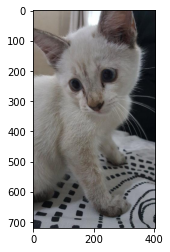

In [ ]:
output = model(img_tensor)
print("Inference Result:")
#print(imagenet_labels[int(torch.argmax(output))])
plt.imshow(img)

In [ ]:
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 768, 14, 14]         590,592
          Identity-2             [-1, 196, 768]               0
        PatchEmbed-3             [-1, 196, 768]               0
           Dropout-4             [-1, 197, 768]               0
         LayerNorm-5             [-1, 197, 768]           1,536
            Linear-6            [-1, 197, 2304]       1,771,776
           Dropout-7         [-1, 12, 197, 197]               0
            Linear-8             [-1, 197, 768]         590,592
           Dropout-9             [-1, 197, 768]               0
        Attention-10             [-1, 197, 768]               0
         Identity-11             [-1, 197, 768]               0
        LayerNorm-12             [-1, 197, 768]           1,536
           Linear-13            [-1, 197, 3072]       2,362,368
             GELU-14            [-1, 19

In [ ]:

loss_fn = nn.MSELoss()
optimizer= torch.optim.Adam(model.parameters(), lr=1e-3,weight_decay=0.00001)
epochs=15
epoch_loss=[]
epochval_loss=[]
for epoch in range(epochs):
    batch_loss=[]
    for batch, (x,y) in enumerate(tqdm(train_loader,desc="Iteration")):
        #print(batch)
        model.train()
        x_cuda=x[0].to(device)
        y_pred=model(x_cuda)
        y=y.to(device)
        loss=loss_fn(y_pred.reshape(x_cuda.shape[0]).float(),y.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.item())
    val_loss=modelEval(model,val_loader)
    model=model.to(device)
    epoch_loss.append(batch_loss)
    epochval_loss.append(val_loss)
    #print()

Iteration: 100%|██████████| 31/31 [00:06<00:00,  4.91it/s]


In [ ]:
torch.save(model, 'vitRegression5.pth')

In [ ]:
from functools  import reduce

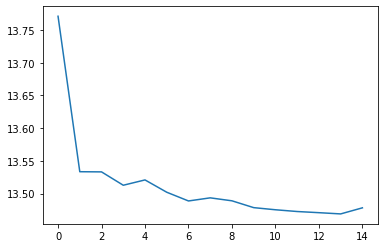

In [ ]:
loss_mean=[]
for batch_loss in epoch_loss:
    mean=reduce(lambda x,y:x+y,batch_loss)/8921
    loss_mean.append(mean)
plt.plot(range(15),loss_mean)

In [ ]:
val_mean=[]
for batch_loss in epochval_loss:
    mean=reduce(lambda x,y:x+y,batch_loss)/991
    val_mean.append(mean)

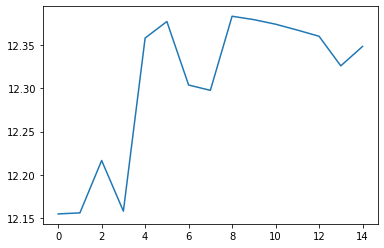

In [ ]:
plt.plot(val_mean)

In [ ]:
def plot(train_loss,val_loss,title=""): 
    fig, ax = plt.subplots(1,figsize=(10,6))
    ax.plot(train_loss)
    ax.set_xlabel("iteration")
    ax.set_ylabel("loss")

    ax.plot(val_loss)
    ax.set_xlabel("iteration")
    ax.set_ylabel("loss")
    ax.legend(["train", "validation"])
    if title:
        fig.suptitle(title)

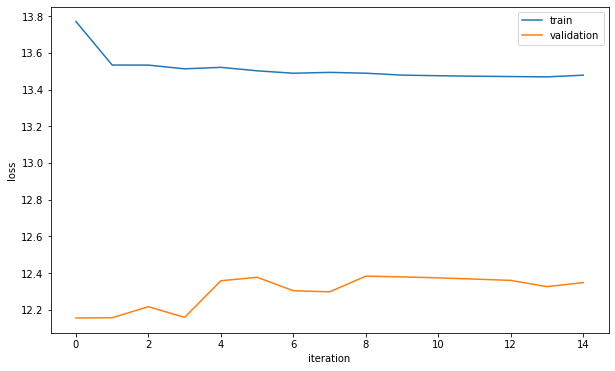

In [ ]:
plot(loss_mean,val_mean)

In [ ]:
patches = model.patch_embed(img_tensor)  # patch embedding convolution
print("Image tensor: ", img_tensor.shape)
print("Patch embeddings: ", patches.shape)

Image tensor:  torch.Size([1, 3, 224, 224])
Patch embeddings:  torch.Size([1, 196, 768])


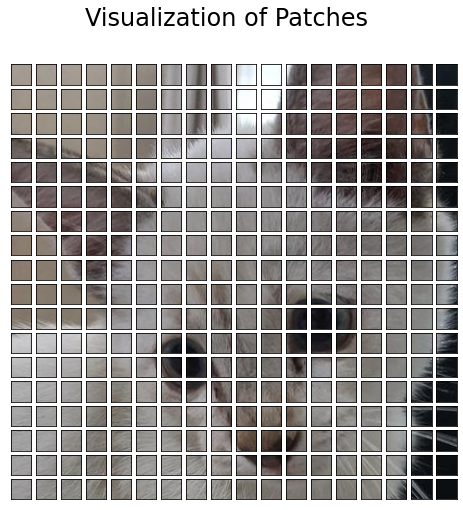

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualization of Patches", fontsize=24)
fig.add_axes()

img = np.asarray(img)
for i in range(0, 324):
    x = i % 18
    y = i // 18
    patch = img[y*20:(y+1)*20, x*20:(x+1)*20]
    ax = fig.add_subplot(18, 18, i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(patch)

In [ ]:
pos_embed = model.pos_embed
print(pos_embed.shape)

torch.Size([1, 197, 768])


In [ ]:
import torch.nn.functional as F

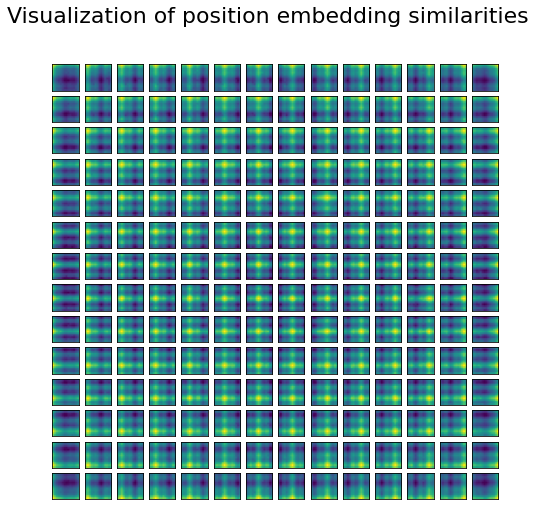

In [ ]:
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualization of position embedding similarities", fontsize=22)
for i in range(1, pos_embed.shape[1]):
    sim = F.cosine_similarity(pos_embed[0, i:i+1], pos_embed[0, 1:], dim=1)*10
    sim = sim.reshape((14, 14)).detach().cpu().numpy()
    ax = fig.add_subplot(14, 14, i)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(sim)

In [ ]:
transformer_input = torch.cat((model.cls_token, patches), dim=1) + pos_embed
print("Transformer input: ", transformer_input.shape)

Transformer input:  torch.Size([1, 197, 768])


In [ ]:
print("Input tensor to Transformer (z0): ", transformer_input.shape)
x = transformer_input.clone()
for i, blk in enumerate(model.blocks):
    print("Entering the Transformer Encoder {}".format(i))
    x = blk(x)
x = model.norm(x)
transformer_output = x[:, 0]
print("Output vector from Transformer (z12-0):", transformer_output.shape)

Input tensor to Transformer (z0):  torch.Size([1, 197, 768])
Entering the Transformer Encoder 0
Entering the Transformer Encoder 1
Entering the Transformer Encoder 2
Entering the Transformer Encoder 3
Entering the Transformer Encoder 4
Entering the Transformer Encoder 5
Entering the Transformer Encoder 6
Entering the Transformer Encoder 7
Entering the Transformer Encoder 8
Entering the Transformer Encoder 9
Entering the Transformer Encoder 10
Entering the Transformer Encoder 11
Output vector from Transformer (z12-0): torch.Size([1, 768])


In [ ]:
print("Transformer Multi-head Attention block:")
attention = model.blocks[0].attn
print(attention)
print("input of the transformer encoder:", transformer_input.shape)

Transformer Multi-head Attention block:
Attention(
  (qkv): Linear(in_features=768, out_features=2304, bias=True)
  (attn_drop): Dropout(p=0.0, inplace=False)
  (proj): Linear(in_features=768, out_features=768, bias=True)
  (proj_drop): Dropout(p=0.0, inplace=False)
)
input of the transformer encoder: torch.Size([1, 197, 768])


In [ ]:
transformer_input_expanded = attention.qkv(transformer_input)[0]
print("expanded to: ", transformer_input_expanded.shape)

expanded to:  torch.Size([197, 2304])


In [ ]:
# Split qkv into mulitple q, k, and v vectors for multi-head attantion
qkv = transformer_input_expanded.reshape(197, 3, 12, 64)  # (N=197, (qkv), H=12, D/H=64)
print("split qkv : ", qkv.shape)
q = qkv[:, 0].permute(1, 0, 2)  # (H=12, N=197, D/H=64)
k = qkv[:, 1].permute(1, 0, 2)  # (H=12, N=197, D/H=64)
kT = k.permute(0, 2, 1)  # (H=12, D/H=64, N=197)
print("transposed ks: ", kT.shape)

split qkv :  torch.Size([197, 3, 12, 64])
transposed ks:  torch.Size([12, 64, 197])


attention matrix:  torch.Size([12, 197, 197])


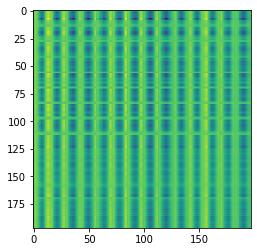

In [ ]:
# Attention Matrix
attention_matrix = q @ kT
print("attention matrix: ", attention_matrix.shape)
plt.imshow(attention_matrix[3].detach().cpu().numpy())

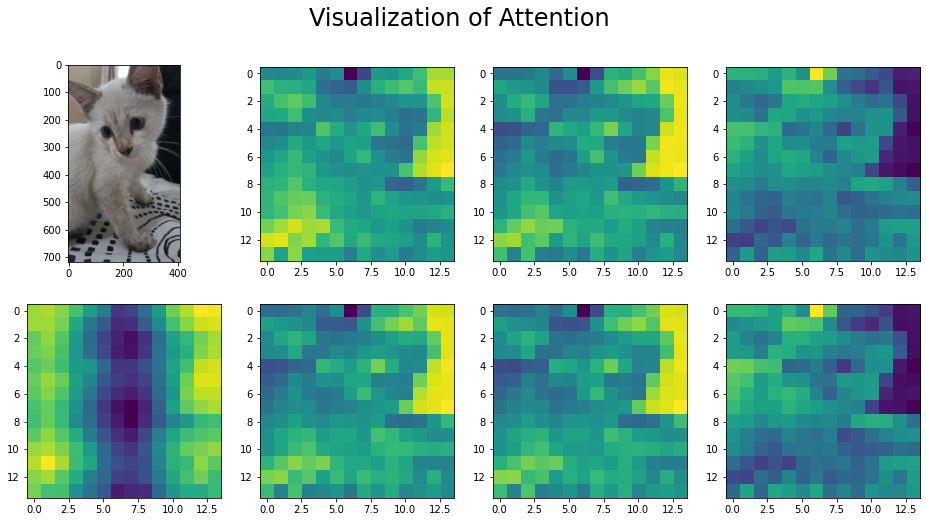

In [ ]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Visualization of Attention", fontsize=24)
fig.add_axes()
img = np.asarray(img)
ax = fig.add_subplot(2, 4, 1)
ax.imshow(img)
for i in range(7):  # visualize the 100th rows of attention matrices in the 0-7th heads
    attn_heatmap = attention_matrix[i, 100, 1:].reshape((14, 14)).detach().cpu().numpy()
    ax = fig.add_subplot(2, 4, i+2)
    ax.imshow(attn_heatmap)